MAX SHARPE RATIO (RANDOM METHODE) :


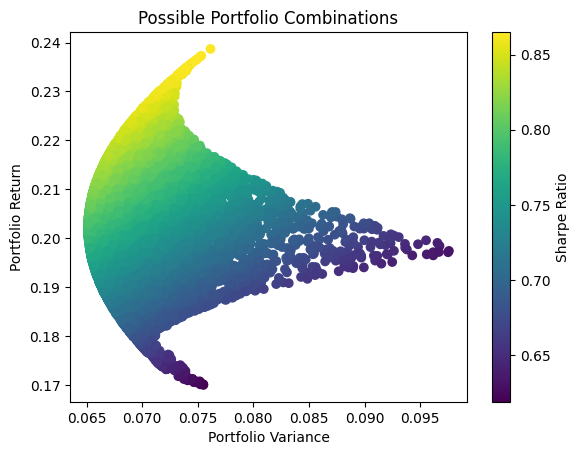

Composition of the Best Portfolio:
AAPL: 0.39%
MSFT: 98.94%
GOOGL: 0.66%
Return          0.238696
Variance        0.076142
StdDev          0.275939
Sharpe Ratio    0.865033
Name: 8260, dtype: float64


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters:
period = '3y'
# List of stocks
tickers = ["AAPL", "MSFT", "GOOGL"]

# Download adjusted historical data for the last 5 years
def download_stock_data(ticker_list):
    data = {}
    for ticker in ticker_list:
        stock = yf.Ticker(ticker)
        data[ticker] = stock.history(period)['Close']
    return pd.DataFrame(data)

# Calculate daily returns
def calculate_daily_returns(dataframe):
    return dataframe.pct_change()

# Download data for the stocks
stock_data = download_stock_data(tickers)

# Calculate daily returns
daily_returns = calculate_daily_returns(stock_data)

# Calculate the mean and covariance matrix of annualized returns
mean_returns = daily_returns.mean() * 252
covariance_matrix = daily_returns.cov() * 252

# Number of random portfolios to generate
num_portfolios = 10000

# Preparing the list to store the returns and variances of the portfolios
results = np.zeros((4, num_portfolios))
best_weights = np.zeros((num_portfolios, len(tickers)))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    best_weights[i, :] = weights

    # Expected return of the portfolio
    portfolio_return = np.dot(weights, mean_returns)
    # Portfolio variance
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))

    results[0,i] = portfolio_return
    results[1,i] = portfolio_variance
    # Portfolio standard deviation (volatility)
    results[2,i] = np.sqrt(portfolio_variance)
    # Sharpe Ratio
    results[3,i] = results[0,i]/results[2,i]

# Convert results into a DataFrame for easier manipulation
portfolios = pd.DataFrame(results.T, columns=['Return', 'Variance', 'StdDev', 'Sharpe Ratio'])

best_sharpe_idx = np.argmax(portfolios['Sharpe Ratio'])
best_sharpe_portfolio = portfolios.iloc[best_sharpe_idx]

# Plot the scatter plot of portfolios
plt.scatter(portfolios['Variance'], portfolios['Return'], c=portfolios['Return'] / portfolios['StdDev'], marker='o')
plt.title('Possible Portfolio Combinations')
plt.xlabel('Portfolio Variance')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Print the composition of the best portfolio
print("Composition of the Best Portfolio:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {100*best_weights[best_sharpe_idx, i]:.2f}%")
print(best_sharpe_portfolio)
